In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from ift6758.data import pd_make_df

from ift6758.client import game_client

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
gc = game_client.GameClient()

In [11]:
model= "xgboost-best-select-features"
df = gc.process_query(2022020329, model_name="xgboost--select-features")
df.shape

(50, 30)

In [3]:
from comet_ml import API
import os
import xgboost as xgb
import random
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

api = API(os.environ["COMET_ML"])

# experiment = api.get("ift-6758-projet-quipe-13/xgboost-models/XGBoost_best_select_features")

In [4]:
# Download a Registry Model:
models = ["xgboost-best-select-features", "xgboost-best-all-features"]
model = models[1]

api.download_registry_model("ift-6758-projet-quipe-13", models[0], "1.0.0", output_path="../serving/models/")

xgb_model = xgb.XGBClassifier()
xgb_model.load_model(f'../serving/models/XGBoost_best_all_features.pkl')

COMET INFO: Downloading registry model 'xgboost-best-select-features', version '1.0.0', stage None from workspace 'ift-6758-projet-quipe-13'...
COMET INFO: Unzipping model to '/stg/Storage/Code/Python/IFT6758/IFT6758-Project-Milestone-3/serving/models' ...
COMET INFO: done!


In [69]:
idx = raw[raw["eventType"].isin(["SHOT", "GOAL"])]["teamTriCode"].reset_index(drop=True)

In [74]:
pd.concat([idx, df], axis=1)[["teamTriCode", "periodTimeSec", "period"]]

,teamTriCode,periodTimeSec,period
0,VGK,72.0,1
1,VGK,131.0,1
2,SEA,158.0,1
3,SEA,174.0,1
4,SEA,324.0,1
5,SEA,344.0,1
6,SEA,398.0,1
7,SEA,466.0,1
8,SEA,480.0,1
9,VGK,496.0,1


In [41]:
xgb_model.predict_proba(df)

array([[0.96853364, 0.03146639],
       [0.98648477, 0.01351525],
       [0.8640037 , 0.1359963 ],
       [0.9409606 , 0.05903942],
       [0.86636806, 0.13363191],
       [0.83077866, 0.16922134],
       [0.9744123 , 0.02558769],
       [0.88804865, 0.11195137],
       [0.9655526 , 0.03444737],
       [0.9436407 , 0.05635932],
       [0.9881459 , 0.01185409],
       [0.88351166, 0.11648832],
       [0.6792226 , 0.32077742],
       [0.94160986, 0.05839014],
       [0.9811729 , 0.01882709],
       [0.9377965 , 0.06220355],
       [0.9773286 , 0.02267139],
       [0.74795425, 0.25204578],
       [0.9922765 , 0.00772351],
       [0.9866114 , 0.01338858],
       [0.88084275, 0.11915727],
       [0.97134954, 0.02865043],
       [0.9259423 , 0.07405767],
       [0.97559613, 0.02440384],
       [0.8418766 , 0.15812339],
       [0.96733   , 0.03267002],
       [0.95987326, 0.04012675],
       [0.9827089 , 0.01729112],
       [0.984009  , 0.015991  ],
       [0.97515744, 0.02484257],
       [0.

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

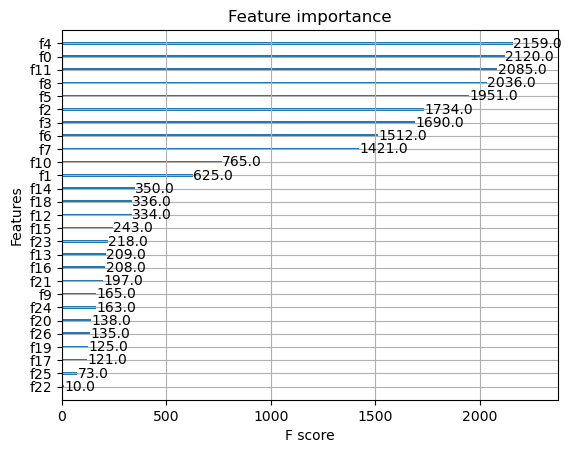

In [15]:
xgb.plot_importance(xgb_model)